# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [72]:
# Create dataframe to store data
world_weather = {"City":cities,"Lat":"","Lng":"","Max Temp":"","Humidity":"","Cloudiness":"","Wind Speed":"","Country":"","Date":""}
world_weather_df = pd.DataFrame(world_weather)

world_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,,,,,,,,
1,chuy,,,,,,,,
2,busselton,,,,,,,,
3,rikitea,,,,,,,,
4,lata,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
# Set base URl
base_url = "http://api.openweathermap.org/data/2.5/weather?q="


# Run API call for each city
print("---Beginning Data Retrieval---")

for index,row in world_weather_df.iterrows():
    
    # Create the query URL for the API call
    query_url = base_url + row["City"] + "&units=imperial" + "&appid=" + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    # Create exception script in case the city is not found 
    try:
        print("Retrieving weather info for " + row["City"] + ".")
        
        # Input the data into the dataframe
        world_weather_df.loc[index,"Lat"] = response["coord"]["lat"]
        world_weather_df.loc[index,"Lng"] = response["coord"]["lon"]
        world_weather_df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        world_weather_df.loc[index,"Humidity"] = response["main"]["humidity"]
        world_weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        world_weather_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        world_weather_df.loc[index,"Country"] = response["sys"]["country"]
        world_weather_df.loc[index,"Date"] = response["dt"]
        
    except (KeyError,IndexError):
        print(row["City"] + " not found. Skipping...")

print(f"---Data Retrieval Complete---")

world_weather_df.head()



---Beginning Data Retrieval---
Retrieving weather info for hilo.
Retrieving weather info for chuy.
Retrieving weather info for busselton.
Retrieving weather info for rikitea.
Retrieving weather info for lata.
Retrieving weather info for bethel.
Retrieving weather info for hofn.
Retrieving weather info for cape town.
Retrieving weather info for trairi.
Retrieving weather info for vaini.
Retrieving weather info for norman wells.
Retrieving weather info for ribeira grande.
Retrieving weather info for albany.
Retrieving weather info for korla.
Retrieving weather info for new norfolk.
Retrieving weather info for chokurdakh.
Retrieving weather info for jamestown.
Retrieving weather info for bathsheba.
Retrieving weather info for constitucion.
Retrieving weather info for choa saidan shah.
Retrieving weather info for myaundzha.
Retrieving weather info for moyale.
Retrieving weather info for mataura.
Retrieving weather info for los llanos de aridane.
Retrieving weather info for victoria.
Retrie

Retrieving weather info for kodiak.
Retrieving weather info for riachao das neves.
Retrieving weather info for mys shmidta.
mys shmidta not found. Skipping...
Retrieving weather info for bredasdorp.
Retrieving weather info for tawkar.
tawkar not found. Skipping...
Retrieving weather info for comodoro rivadavia.
Retrieving weather info for huarmey.
Retrieving weather info for saint-augustin.
Retrieving weather info for aksarka.
Retrieving weather info for ust-kut.
Retrieving weather info for uzumlu.
uzumlu not found. Skipping...
Retrieving weather info for kpandu.
Retrieving weather info for tabou.
Retrieving weather info for aklavik.
Retrieving weather info for karaul.
karaul not found. Skipping...
Retrieving weather info for mingguang.
Retrieving weather info for san patricio.
Retrieving weather info for san francisco de macoris.
Retrieving weather info for provideniya.
Retrieving weather info for khatanga.
Retrieving weather info for wawa.
Retrieving weather info for mankovo-kalitven

Retrieving weather info for rupert.
Retrieving weather info for beringovskiy.
Retrieving weather info for korampallam.
Retrieving weather info for aras.
Retrieving weather info for jandayan.
Retrieving weather info for chufarovo.
Retrieving weather info for florianopolis.
Retrieving weather info for keningau.
Retrieving weather info for raga.
Retrieving weather info for nakuru.
Retrieving weather info for hay river.
Retrieving weather info for kiruna.
Retrieving weather info for dalaba.
Retrieving weather info for muncar.
Retrieving weather info for namalenga.
Retrieving weather info for portland.
Retrieving weather info for port blair.
Retrieving weather info for deputatskiy.
Retrieving weather info for kawalu.
Retrieving weather info for ponta delgada.
Retrieving weather info for mareeba.
Retrieving weather info for srednekolymsk.
Retrieving weather info for grindavik.
Retrieving weather info for nizhniy baskunchak.
Retrieving weather info for omsukchan.
Retrieving weather info for u

Retrieving weather info for puerto leguizamo.
Retrieving weather info for mocambique.
mocambique not found. Skipping...
Retrieving weather info for jacutinga.
Retrieving weather info for hamilton.
---Data Retrieval Complete---


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,75.2,73,20,3.36,US,1589005196
1,chuy,-33.7,-53.46,49.19,83,0,6.31,UY,1589005223
2,busselton,-33.65,115.33,66,39,0,4.88,AU,1589005192
3,rikitea,-23.12,-134.97,76.06,68,71,5.7,PF,1589005177
4,lata,40.16,-8.33,57.99,88,99,1.99,PT,1589005470



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
# Drop all rows with na
clean_df = world_weather_df.loc[world_weather_df["Lat"] != ""]

len(clean_df)

# # Export weather data to csv
clean_df.to_csv("../output_data/world_weather.csv")

In [75]:
# Display the DataFrame
clean_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,75.2,73,20,3.36,US,1589005196
1,chuy,-33.7,-53.46,49.19,83,0,6.31,UY,1589005223
2,busselton,-33.65,115.33,66,39,0,4.88,AU,1589005192
3,rikitea,-23.12,-134.97,76.06,68,71,5.7,PF,1589005177
4,lata,40.16,-8.33,57.99,88,99,1.99,PT,1589005470
...,...,...,...,...,...,...,...,...,...
599,dingle,11,122.67,95.63,39,96,10.36,PH,1589005188
600,medowie,-32.73,151.87,70,56,75,17.22,AU,1589005357
601,puerto leguizamo,-0.19,-74.78,71.26,98,100,2.82,CO,1589005626
603,jacutinga,-22.29,-46.61,50.07,91,0,5.32,BR,1589005627


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
#  Get the indices of cities that have humidity over 100%.

humidity = pd.to_numeric(world_weather_df["Humidity"])

test_df = world_weather_df[humidity > 100]

test_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [77]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [78]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


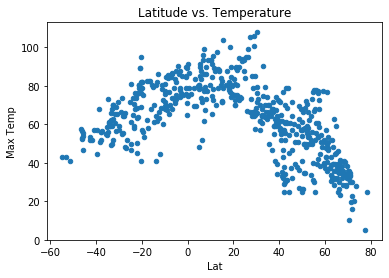

In [79]:
clean_df["Lat"] = pd.to_numeric(clean_df["Lat"])
clean_df["Max Temp"] = pd.to_numeric(clean_df["Max Temp"])

clean_df.plot.scatter(x="Lat",y="Max Temp")
plt.title("Latitude vs. Temperature")

plt.savefig("LatVsTemp.png")

plt.show()

## Latitude vs. Humidity Plot

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


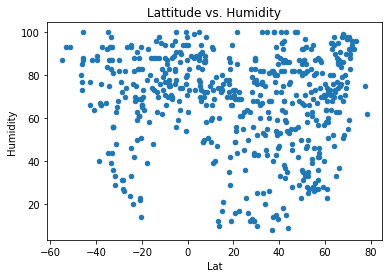

In [80]:
clean_df["Lat"] = pd.to_numeric(clean_df["Lat"])
clean_df["Humidity"] = pd.to_numeric(clean_df["Humidity"])

clean_df.plot.scatter(x="Lat",y="Humidity")
plt.title("Lattitude vs. Humidity")

plt.savefig("LatVsHum.png")

plt.show()

## Latitude vs. Cloudiness Plot

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


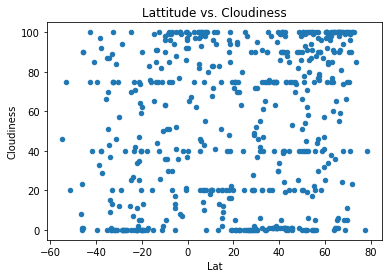

In [81]:
clean_df["Lat"] = pd.to_numeric(clean_df["Lat"])
clean_df["Cloudiness"] = pd.to_numeric(clean_df["Cloudiness"])

clean_df.plot.scatter(x="Lat",y="Cloudiness")
plt.title("Lattitude vs. Cloudiness")

plt.savefig("LatVsCloud.png")

plt.show()

## Latitude vs. Wind Speed Plot

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


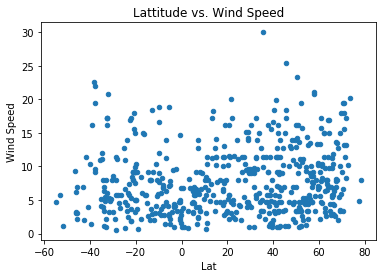

In [82]:
clean_df["Lat"] = pd.to_numeric(clean_df["Lat"])
clean_df["Wind Speed"] = pd.to_numeric(clean_df["Wind Speed"])

clean_df.plot.scatter(x="Lat",y="Wind Speed")
plt.title("Lattitude vs. Wind Speed")

plt.savefig("LatVsWind.png")

plt.show()

## Linear Regression

In [83]:
# OPTIONAL: Create a function to create Linear Regression plots

In [84]:
# Create Northern and Southern Hemisphere DataFrames
from scipy import stats


northern_df = clean_df.loc[clean_df["Lat"] >= 0]
southern_df = clean_df.loc[clean_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


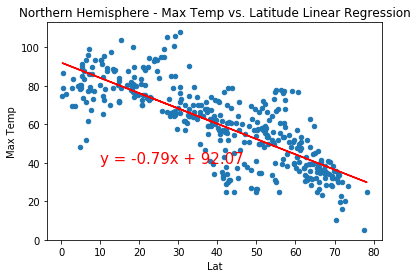

In [85]:
northern_df["Lat"] = pd.to_numeric(northern_df["Lat"])
northern_df["Max Temp"] = pd.to_numeric(northern_df["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Max Temp"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

northern_df.plot.scatter(x="Lat",y="Max Temp")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.savefig("NorthTempvsLat.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


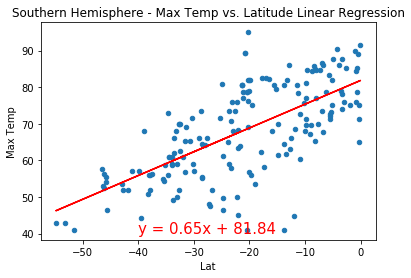

In [86]:
southern_df["Lat"] = pd.to_numeric(southern_df["Lat"])
southern_df["Max Temp"] = pd.to_numeric(southern_df["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Max Temp"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

southern_df.plot.scatter(x="Lat",y="Max Temp")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.savefig("SouthTempVsLat.png")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


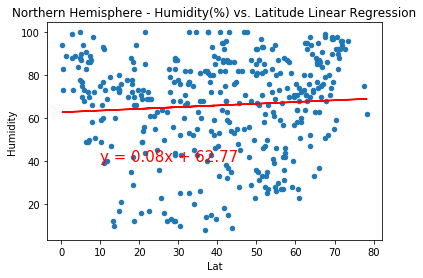

In [87]:
northern_df["Lat"] = pd.to_numeric(northern_df["Lat"])
northern_df["Humidity"] = pd.to_numeric(northern_df["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Humidity"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

northern_df.plot.scatter(x="Lat",y="Humidity")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

plt.savefig("NorthHumVsLat.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


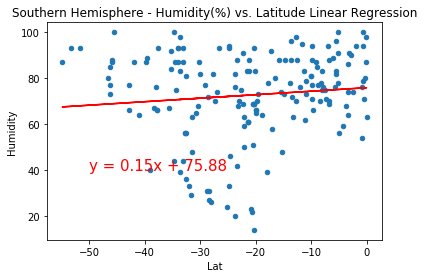

In [88]:
southern_df["Lat"] = pd.to_numeric(southern_df["Lat"])
southern_df["Humidity"] = pd.to_numeric(southern_df["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Humidity"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

southern_df.plot.scatter(x="Lat",y="Humidity")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

plt.savefig("SouthHumVsLat.png")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


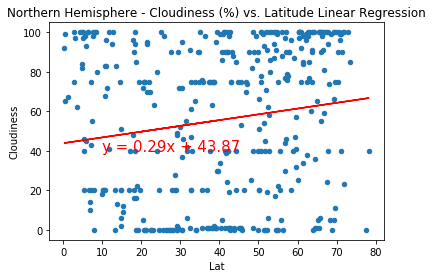

In [89]:
northern_df["Lat"] = pd.to_numeric(northern_df["Lat"])
northern_df["Cloudiness"] = pd.to_numeric(northern_df["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

northern_df.plot.scatter(x="Lat",y="Cloudiness")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.savefig("NorthCloudVsLat.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


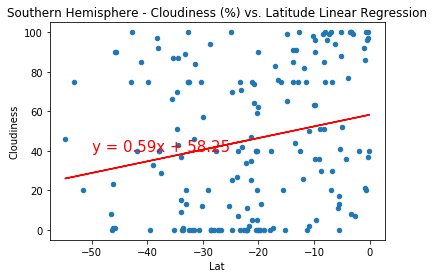

In [90]:
southern_df["Lat"] = pd.to_numeric(southern_df["Lat"])
southern_df["Cloudiness"] = pd.to_numeric(southern_df["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Cloudiness"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

southern_df.plot.scatter(x="Lat",y="Cloudiness")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.savefig("SouthCloudVsLat.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


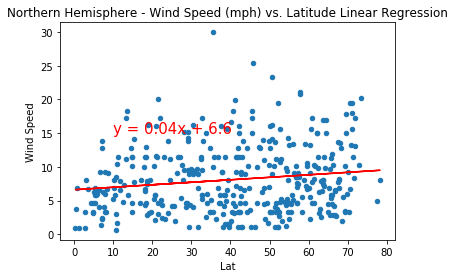

In [91]:
northern_df["Lat"] = pd.to_numeric(northern_df["Lat"])
northern_df["Wind Speed"] = pd.to_numeric(northern_df["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Wind Speed"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

northern_df.plot.scatter(x="Lat",y="Wind Speed")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.savefig("NorthWindVsLat.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chcho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


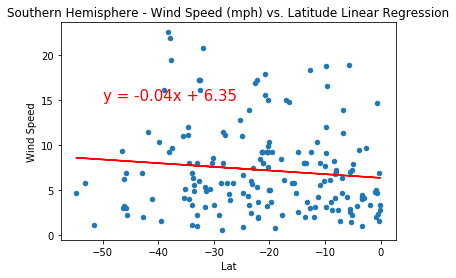

In [92]:
southern_df["Lat"] = pd.to_numeric(southern_df["Lat"])
southern_df["Wind Speed"] = pd.to_numeric(southern_df["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Wind Speed"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

southern_df.plot.scatter(x="Lat",y="Wind Speed")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.savefig("SouthWindVsLat.png")

plt.show()
